# Credit Card Fraud Detection

When discussing financial transactions and consumer security on digital platforms, the
current market is defined by everyday credit card purchases, which contributes to a signi-
ficant increase in different types of fraud. Considering these perspectives, the Credit Card
Fraud Detection dataset was chosen to be used in order to understand the process behind
this application standard used by global companies. Therefore, the aim of Task 1 is to
develop a neural network for credit card fraud detection by understanding the pattern of
fraudulent activities.

In [9]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from scipy.stats import truncnorm
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

## EDA

In [10]:
# Load the dataset using pandas read_csv 

df = pd.read_csv('credit_card_fraud_dataset.csv')

In [11]:
# Display dataset shape of the datasets

df.shape

(100000, 7)

In [12]:
# Display first 10 rows of the dataset 

df.head(10)

,TransactionID,TransactionDate,Amount,MerchantID,TransactionType,Location,IsFraud
0,1,2024-04-03 14:15:35.462794,4189.27,688,refund,San Antonio,0
1,2,2024-03-19 13:20:35.462824,2659.71,109,refund,Dallas,0
2,3,2024-01-08 10:08:35.462834,784.00,394,purchase,New York,0
3,4,2024-04-13 23:50:35.462850,3514.40,944,purchase,Philadelphia,0
4,5,2024-07-12 18:51:35.462858,369.07,475,purchase,Phoenix,0
5,6,2024-08-30 01:52:35.462867,3086.22,302,purchase,New York,0
6,7,2024-01-02 11:31:35.462875,1466.90,902,refund,Philadelphia,0
7,8,2024-05-12 12:25:35.462885,917.21,266,purchase,New York,0
8,9,2023-11-16 02:20:35.462894,1625.73,32,refund,Chicago,0
9,10,2023-10-24 06:51:35.462901,662.07,193,purchase,Dallas,0


In [13]:
# Understanding the datatypes of all the features columns of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   TransactionID    100000 non-null  int64  
 1   TransactionDate  100000 non-null  object 
 2   Amount           100000 non-null  float64
 3   MerchantID       100000 non-null  int64  
 4   TransactionType  100000 non-null  object 
 5   Location         100000 non-null  object 
 6   IsFraud          100000 non-null  int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 5.3+ MB


In [14]:
# Statistical Analysis of the dataset 

df.describe()

,TransactionID,Amount,MerchantID,IsFraud
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,2497.092666,501.676070,0.010000
std,28867.657797,1442.415999,288.715868,0.099499
min,1.000000,1.050000,1.000000,0.000000
25%,25000.750000,1247.955000,252.000000,0.000000
50%,50000.500000,2496.500000,503.000000,0.000000
75%,75000.250000,3743.592500,753.000000,0.000000
max,100000.000000,4999.770000,1000.000000,1.000000


In [15]:
# Checking null values present in the dataset

df.isnull().sum()

TransactionID      0
TransactionDate    0
Amount             0
MerchantID         0
TransactionType    0
Location           0
IsFraud            0
dtype: int64

In [16]:
# Reset index columns to Transaction ID

df = df.set_index('TransactionID')

df

,TransactionDate,Amount,MerchantID,TransactionType,Location,IsFraud
TransactionID,,,,,,
1,2024-04-03 14:15:35.462794,4189.27,688,refund,San Antonio,0
2,2024-03-19 13:20:35.462824,2659.71,109,refund,Dallas,0
3,2024-01-08 10:08:35.462834,784.00,394,purchase,New York,0
4,2024-04-13 23:50:35.462850,3514.40,944,purchase,Philadelphia,0
5,2024-07-12 18:51:35.462858,369.07,475,purchase,Phoenix,0
...,...,...,...,...,...,...
99996,2024-06-07 00:57:36.027591,1057.29,289,refund,San Antonio,0
99997,2023-10-22 23:12:36.027594,297.25,745,refund,San Antonio,0
99998,2024-05-31 19:27:36.027597,3448.56,690,purchase,San Antonio,0


In [17]:
# Find the Balance in the target 

df['IsFraud'].value_counts()

IsFraud
0    99000
1     1000
Name: count, dtype: int64

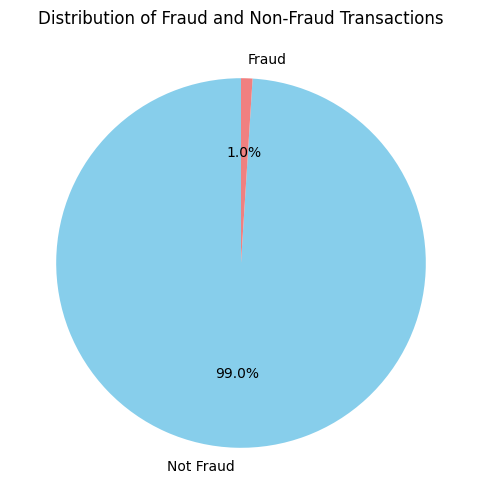

In [18]:
#Pie Chart representation to understand balance of the target columns
comparing_values = df['IsFraud'].value_counts()

labels = comparing_values.index.map({0: "Not Fraud", 1: "Fraud"})

plt.figure(figsize=(6, 6))
plt.pie(
    comparing_values,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    colors=['skyblue', 'lightcoral']
)
plt.title("Distribution of Fraud and Non-Fraud Transactions")
plt.show()

In [19]:
# Different types of locations and locations that appear most in the dataset

df['Location'].value_counts()

Location
Chicago         10193
San Diego       10111
Dallas          10076
San Antonio     10062
New York         9993
Houston          9991
Phoenix          9960
Los Angeles      9936
Philadelphia     9873
San Jose         9805
Name: count, dtype: int64

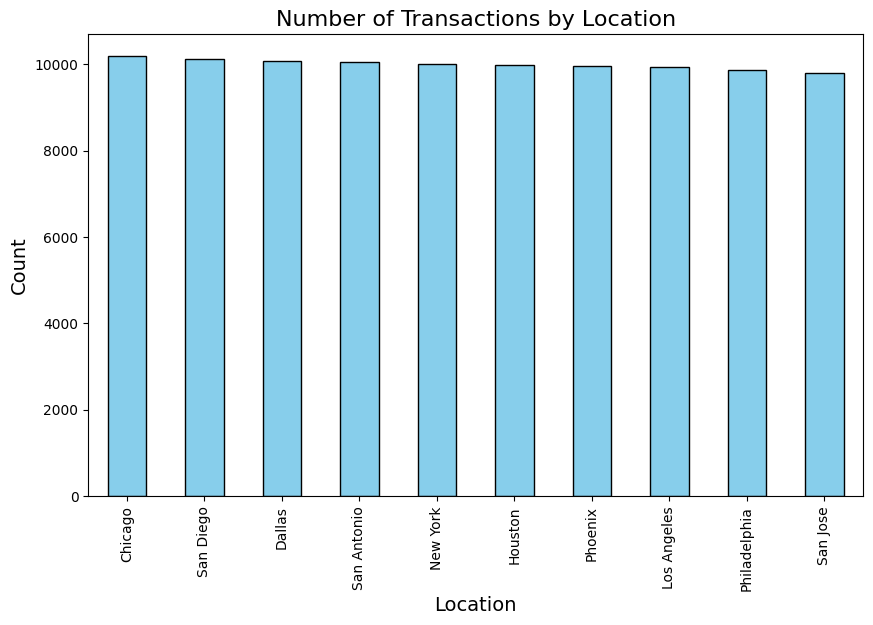

In [20]:
# Graphical represention of the location
location_total = df['Location'].value_counts()

plt.figure(figsize=(10, 6))
location_total.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Number of Transactions by Location', fontsize=16)
plt.xlabel('Location', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

In [21]:
# Total Amount related to  TransactionType 

df.groupby(['TransactionType'])['Amount'].sum()

TransactionType
purchase    1.246949e+08
refund      1.250144e+08
Name: Amount, dtype: float64

In [22]:
# Verify data range of dataset 

least_recent_date = df['TransactionDate'].min()
most_recent_date = df['TransactionDate'].max()


print("Data range :", least_recent_date,"until",most_recent_date)

Data range : 2023-10-21 09:28:35.824439 until 2024-10-21 09:20:35.961088


In [ ]:
# Total of Amount per  distinct TransactionDate in descending order 

df_date = df.copy()

df_date['TransactionDate'] = pd.to_datetime(df_date['TransactionDate']).dt.date


transaction_date_amount = df_date.groupby(['TransactionDate'])['Amount'].sum().sort_index(ascending=True)

transaction_date_amount

TransactionDate
2023-10-21    369760.87
2023-10-22    717626.99
2023-10-23    615269.75
2023-10-24    671223.41
2023-10-25    618389.80
                ...    
2024-10-17    681295.57
2024-10-18    704287.87
2024-10-19    590240.51
2024-10-20    652894.65
2024-10-21    280354.61
Name: Amount, Length: 367, dtype: float64

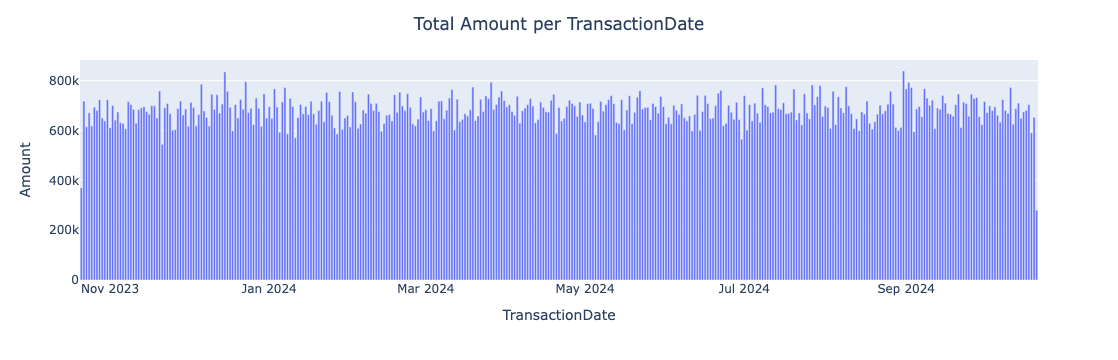

In [ ]:
# Amount per Transaction Date

fig = px.bar(transaction_date_amount, x=transaction_date_amount.index, y="Amount")
fig.update_layout(
      title={
        'text': "Total Amount per TransactionDate",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    xaxis_title="TransactionDate",
    yaxis_title="Amount"
)
fig.show()

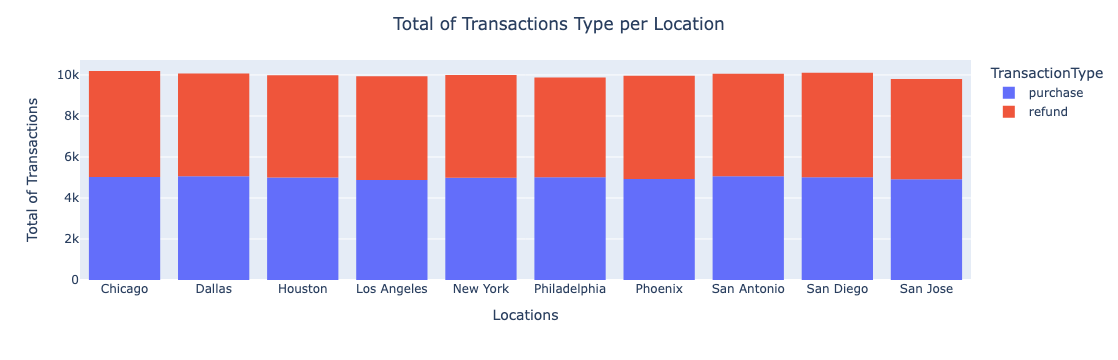

In [ ]:
# Total of Refund and Purchase
transaction_counts = df.groupby(['Location', 'TransactionType']).size().reset_index(name='Count')

transaction_counts
fig = px.histogram(transaction_counts, x="Location", y="Count", color="TransactionType")
fig.update_layout(
      title={
        'text': "Total of Transactions Type per Location",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    xaxis_title="Locations",
    yaxis_title="Total of Transactions"

)

fig.show()

In [ ]:
# Convert 'TransactionDate' to datetime and extract date-related features

df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
df['Year'] = df['TransactionDate'].dt.year
df['Month'] = df['TransactionDate'].dt.month
df['Day'] = df['TransactionDate'].dt.day
df['Hour'] = df['TransactionDate'].dt.hour

df

,TransactionDate,Amount,MerchantID,TransactionType,Location,IsFraud,Year,Month,Day,Hour
TransactionID,,,,,,,,,,
1,2024-04-03 14:15:35.462794,4189.27,688,refund,San Antonio,0,2024,4,3,14
2,2024-03-19 13:20:35.462824,2659.71,109,refund,Dallas,0,2024,3,19,13
3,2024-01-08 10:08:35.462834,784.00,394,purchase,New York,0,2024,1,8,10
4,2024-04-13 23:50:35.462850,3514.40,944,purchase,Philadelphia,0,2024,4,13,23
5,2024-07-12 18:51:35.462858,369.07,475,purchase,Phoenix,0,2024,7,12,18
...,...,...,...,...,...,...,...,...,...,...
99996,2024-06-07 00:57:36.027591,1057.29,289,refund,San Antonio,0,2024,6,7,0
99997,2023-10-22 23:12:36.027594,297.25,745,refund,San Antonio,0,2023,10,22,23
99998,2024-05-31 19:27:36.027597,3448.56,690,purchase,San Antonio,0,2024,5,31,19


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 1 to 100000
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   TransactionDate  100000 non-null  datetime64[ns]
 1   Amount           100000 non-null  float64       
 2   MerchantID       100000 non-null  int64         
 3   TransactionType  100000 non-null  object        
 4   Location         100000 non-null  object        
 5   IsFraud          100000 non-null  int64         
 6   Year             100000 non-null  int32         
 7   Month            100000 non-null  int32         
 8   Day              100000 non-null  int32         
 9   Hour             100000 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(4), int64(2), object(2)
memory usage: 6.9+ MB


In [ ]:
df

,TransactionDate,Amount,MerchantID,TransactionType,Location,IsFraud,Year,Month,Day,Hour
TransactionID,,,,,,,,,,
1,2024-04-03 14:15:35.462794,4189.27,688,refund,San Antonio,0,2024,4,3,14
2,2024-03-19 13:20:35.462824,2659.71,109,refund,Dallas,0,2024,3,19,13
3,2024-01-08 10:08:35.462834,784.00,394,purchase,New York,0,2024,1,8,10
4,2024-04-13 23:50:35.462850,3514.40,944,purchase,Philadelphia,0,2024,4,13,23
5,2024-07-12 18:51:35.462858,369.07,475,purchase,Phoenix,0,2024,7,12,18
...,...,...,...,...,...,...,...,...,...,...
99996,2024-06-07 00:57:36.027591,1057.29,289,refund,San Antonio,0,2024,6,7,0
99997,2023-10-22 23:12:36.027594,297.25,745,refund,San Antonio,0,2023,10,22,23
99998,2024-05-31 19:27:36.027597,3448.56,690,purchase,San Antonio,0,2024,5,31,19


In [24]:
##Encoding categorical features
df_encoded = pd.get_dummies(df, columns=['TransactionType', 'Location'], dtype=int)
df_encoded

,TransactionDate,Amount,MerchantID,IsFraud,TransactionType_purchase,TransactionType_refund,Location_Chicago,Location_Dallas,Location_Houston,Location_Los Angeles,Location_New York,Location_Philadelphia,Location_Phoenix,Location_San Antonio,Location_San Diego,Location_San Jose
TransactionID,,,,,,,,,,,,,,,,
1,2024-04-03 14:15:35.462794,4189.27,688,0,0,1,0,0,0,0,0,0,0,1,0,0
2,2024-03-19 13:20:35.462824,2659.71,109,0,0,1,0,1,0,0,0,0,0,0,0,0
3,2024-01-08 10:08:35.462834,784.00,394,0,1,0,0,0,0,0,1,0,0,0,0,0
4,2024-04-13 23:50:35.462850,3514.40,944,0,1,0,0,0,0,0,0,1,0,0,0,0
5,2024-07-12 18:51:35.462858,369.07,475,0,1,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99996,2024-06-07 00:57:36.027591,1057.29,289,0,0,1,0,0,0,0,0,0,0,1,0,0
99997,2023-10-22 23:12:36.027594,297.25,745,0,0,1,0,0,0,0,0,0,0,1,0,0
99998,2024-05-31 19:27:36.027597,3448.56,690,0,1,0,0,0,0,0,0,0,0,1,0,0


In [25]:
y = df_encoded['IsFraud']
X = df_encoded.drop(columns = ['IsFraud','TransactionDate'])

print(X.shape)
print(y.shape)

(100000, 14)
(100000,)


In [26]:
##Split the data into train and test data for model trainign and evaluration
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [27]:
##Scaling the data into a standard distribution for neural network training
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [32]:

## Balancing the dataset
from imblearn.over_sampling import SMOTE


# oversampling the train dataset using SMOTE
smt = SMOTE()
X_train_sm, y_train_sm = smt.fit_resample(X_train_scaled, y_train)

## Building Neural Network 

##### The code above was based in Lab 06 of Programming Programming and Mathematics for Artificial Intelligence from Dr. Atif Riaz

In [29]:
##Neural Network 

def truncated_normal(mean=0, sd=1, low=0, upp=10):
    return truncnorm(
        (low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)

class NeuralNetwork:
    def __init__(self,
                 no_of_in_nodes,
                 no_of_out_nodes,
                 no_of_hidden_nodes1,
                 no_of_hidden_nodes2,
                 learning_rate,
                 optimizer="mini_batch_sgd",  # Choose optimizer between mini batch and sgd
                 l1_lambda=0.0,               # L1 regularization strength which can be adjusted according to the accuracy
                 l2_lambda=0.0,               # L2 regularization strength also can ve adjusted according to the final accuracy
                 hidden_activation="relu",
                 output_activation="sigmoid",
                 dropout_rate=0.0  # Dropout rate and preferred drop out can be set as 0.5
                ):
        self.no_of_in_nodes = no_of_in_nodes
        self.no_of_out_nodes = no_of_out_nodes
        self.no_of_hidden_nodes1 = no_of_hidden_nodes1
        self.no_of_hidden_nodes2 = no_of_hidden_nodes2
        self.learning_rate = learning_rate
        self.optimizer = optimizer.lower()  # Convert to lowercase for consistency
        self.l1_lambda = l1_lambda
        self.l2_lambda = l2_lambda
        self.hidden_activation = hidden_activation
        self.output_activation = output_activation
        self.dropout_rate = dropout_rate
        self.create_weight_matrices()

    def create_weight_matrices(self):
        X = truncated_normal(mean=0, sd=1, low=-0.5, upp=0.5)

        # Create wih1 with shape [hidden1 x in]
        self.wih1 = X.rvs(self.no_of_hidden_nodes1 * self.no_of_in_nodes).reshape(
            (self.no_of_hidden_nodes1, self.no_of_in_nodes)
        )

        # Create wh1h2 with shape [hidden2 x hidden1]
        self.wh1h2 = X.rvs(self.no_of_hidden_nodes2 * self.no_of_hidden_nodes1).reshape(
            (self.no_of_hidden_nodes2, self.no_of_hidden_nodes1)
        )

        # Create who with shape [out from last layer x hidden2]
        self.who = X.rvs(self.no_of_out_nodes * self.no_of_hidden_nodes2).reshape(
            (self.no_of_out_nodes, self.no_of_hidden_nodes2)
        )

    # Activation functions
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        sig = self.sigmoid(x)
        return sig * (1 - sig)

    def relu(self, x):
        return np.maximum(0, x)

    def relu_derivative(self, x):
        return np.where(x > 0, 1, 0)

    def softmax(self, x):
        exps = np.exp(x - np.max(x))
        return exps / np.sum(exps, axis=0, keepdims=True)

    def cross_entropy_loss(self, predictions, targets):
        return -np.sum(targets * np.log(predictions + 1e-15))

    def cross_entropy_derivative(self, predictions, targets):
        return predictions - targets

    def l1_regularization(self, weights):
        return self.l1_lambda * np.sign(weights)

    def l2_regularization(self, weights):
        return self.l2_lambda * weights

    def activate(self, x, function):
        if function == "sigmoid":
            return self.sigmoid(x)
        elif function == "relu":
            return self.relu(x)
        elif function == "softmax":
            return self.softmax(x)
        else:
            raise ValueError("Unknown activation function")

    def activate_derivative(self, x, function):
        if function == "sigmoid":
            return self.sigmoid_derivative(x)
        elif function == "relu":
            return self.relu_derivative(x)
        else:
            raise ValueError("Unknown activation function")

    def apply_dropout(self, activations):
        """Apply dropout to the activations."""
        if self.dropout_rate > 0:
            dropout_mask = np.random.rand(*activations.shape) > self.dropout_rate
            return activations * dropout_mask / (1.0 - self.dropout_rate)  # Scale activations
        return activations
    def train_single(self, input_vector, target_vector):
        input_vector = np.array(input_vector, ndmin=2).T
        target_vector = np.array(target_vector, ndmin=2).T

        # Forward pass with dropout
        hidden_input1 = np.dot(self.wih1, input_vector)
        hidden_output1 = self.activate(hidden_input1, self.hidden_activation)
        hidden_output1 = self.apply_dropout(hidden_output1)  # Apply dropout

        hidden_input2 = np.dot(self.wh1h2, hidden_output1)
        hidden_output2 = self.activate(hidden_input2, self.hidden_activation)
        hidden_output2 = self.apply_dropout(hidden_output2)  # Apply dropout

        final_input = np.dot(self.who, hidden_output2)
        final_output = self.activate(final_input, self.output_activation)

        # Compute loss
        loss = self.cross_entropy_loss(final_output, target_vector)

        # Backward pass
        output_errors = self.cross_entropy_derivative(final_output, target_vector)
        l1_who = self.l1_regularization(self.who)
        l2_who = self.l2_regularization(self.who)
        self.who -= self.learning_rate * (np.dot(output_errors, hidden_output2.T) + l1_who + l2_who)

        hidden_errors2 = np.dot(self.who.T, output_errors)
        hidden_grad2 = hidden_errors2 * self.activate_derivative(hidden_input2, self.hidden_activation)
        l1_wh1h2 = self.l1_regularization(self.wh1h2)
        l2_wh1h2 = self.l2_regularization(self.wh1h2)
        self.wh1h2 -= self.learning_rate * (np.dot(hidden_grad2, hidden_output1.T) + l1_wh1h2 + l2_wh1h2)

        hidden_errors1 = np.dot(self.wh1h2.T, hidden_grad2)
        hidden_grad1 = hidden_errors1 * self.activate_derivative(hidden_input1, self.hidden_activation)
        l1_wih1 = self.l1_regularization(self.wih1)
        l2_wih1 = self.l2_regularization(self.wih1)
        self.wih1 -= self.learning_rate * (np.dot(hidden_grad1, input_vector.T) + l1_wih1 + l2_wih1)

        return loss

    def train_batch(self, batch_data, batch_labels):
        """Train the network on a batch of data."""
        total_loss = 0
        for input_vector, target_vector in zip(batch_data, batch_labels):
            total_loss += self.train_single(input_vector, target_vector)
        return total_loss / len(batch_data)

    # SGD
    def sgd(self, data, labels):
        """Stochastic Gradient Descent (SGD).SGD will Updates weights for every data point training ."""
        total_loss = 0
        for i in range(len(data)):
            loss = self.train_single(data[i], labels[i])
            total_loss += loss
        return total_loss / len(data)

    # Mini-Batch Optimizer
    def mini_batch_sgd(self, data, labels, batch_size=32):
        """Mini-Batch Stochastic Gradient Descent will update the weight after each batch of training."""
        total_loss = 0
        for i in range(0, len(data), batch_size):
            batch_data = data[i:i + batch_size]
            batch_labels = labels[i:i + batch_size]
            loss = self.train_batch(batch_data, batch_labels)
            total_loss += loss
        return total_loss / (len(data) // batch_size)

    def train(self, data, labels, batch_size=32):
        """Train the network using the selected optimizer."""
        if self.optimizer == "sgd":
            return self.sgd(data, labels)
        elif self.optimizer == "mini_batch_sgd":
            return self.mini_batch_sgd(data, labels, batch_size)
        else:
            raise ValueError(f"Unknown optimizer: {self.optimizer}")

    def run(self, input_vector):
        input_vector = np.array(input_vector, ndmin=2).T
        hidden_input1 = np.dot(self.wih1, input_vector)
        hidden_output1 = self.activate(hidden_input1, self.hidden_activation)

        hidden_input2 = np.dot(self.wh1h2, hidden_output1)
        hidden_output2 = self.activate(hidden_input2, self.hidden_activation)

        final_input = np.dot(self.who, hidden_output2)
        final_output = self.activate(final_input, self.output_activation)

        return final_output

    def evaluate(self, data, labels):
        corrects, wrongs = 0, 0
        for i in range(len(data)):
           res = self.run(data[i])  # Get the network's output
           prediction = 1 if res >= 0.5 else 0  # Threshold the sigmoid output
           if prediction == labels[i]:  # Compare prediction with the actual label
                corrects += 1
           else:
                wrongs += 1
        return corrects, wrongs

In [30]:
##Defining the Class

simple_network = NeuralNetwork(
    no_of_in_nodes=X_train_sm.shape[1],
    no_of_out_nodes=1,
    no_of_hidden_nodes1=32,
    no_of_hidden_nodes2=16,
    learning_rate=0.01,
    optimizer="mini_batch_sgd",  # Choose optimizer
    dropout_rate=0.1
)


###  training with batch size 10


In [ ]:
# Assuming you have initialized X_train, X_test, y_train, y_test

# 1. Initialize your neural network
simple_network = NeuralNetwork(
    no_of_in_nodes=X_train_sm.shape[1],  # Number of input nodes (features)
    no_of_out_nodes=1,  # Number of output nodes (assuming binary classification)
    no_of_hidden_nodes1=32,  # Number of nodes in hidden layer 1
    no_of_hidden_nodes2=16,  # Number of nodes in hidden layer 2
    learning_rate=0.001,  # Learning rate for optimization
    optimizer="mini_batch_sgd",  # Choose optimizer (e.g., mini-batch SGD)
    l1_lambda=0.001,  # L1 regularization strength
    l2_lambda=0.001,  # L2 regularization strength
    hidden_activation="relu",  # Activation function for hidden layers
    output_activation="sigmoid",  # Output activation function (sigmoid for binary classification)
    dropout_rate=0.1  # Dropout rate (if desired)
)

# 2. Train the neural network on the training data
batch_size = 64  # Adjust batch size as needed
epochs = 10  # Number of epochs (iterations over the training data)

for epoch in range(epochs):
    avg_loss = simple_network.train(X_train_sm, y_train_sm, batch_size=batch_size)
    print(f"Epoch {epoch+1}/{epochs}, Average Loss: {avg_loss}")

# 3. Evaluate the neural network on the test data
corrects, wrongs = simple_network.evaluate(X_test_scaled, y_test)
total = corrects + wrongs
accuracy = corrects / total
print(f"Accuracy on test set: {accuracy:.2%}")


Epoch 1/10, Average Loss: 0.03898409013089522
Epoch 2/10, Average Loss: 0.036898290571002454
Epoch 3/10, Average Loss: 0.033789876164466805
Epoch 4/10, Average Loss: 0.03249508241716919
Epoch 5/10, Average Loss: 0.032589423799440485
Epoch 6/10, Average Loss: 0.03195225476637087
Epoch 7/10, Average Loss: 0.032102550467582126
Epoch 8/10, Average Loss: 0.03194347068061742
Epoch 9/10, Average Loss: 0.03218983720947253
Epoch 10/10, Average Loss: 0.032399810379974824
Accuracy on test set: 0.96%


### Second training

In [ ]:
# 1. Initialize your neural network
simple_network = NeuralNetwork(
    no_of_in_nodes=X_train_sm.shape[1],  # Number of input nodes (features)
    no_of_out_nodes=1,  # Number of output nodes (assuming binary classification)
    no_of_hidden_nodes1=32,  # Number of nodes in hidden layer 1
    no_of_hidden_nodes2=16,  # Number of nodes in hidden layer 2
    learning_rate=0.001,  # Learning rate for optimization
    optimizer="SGD",  # Choose optimizer (e.g., mini-batch SGD)
    l1_lambda=0.1,  # L1 regularization strength
    l2_lambda=0.1,  # L2 regularization strength
    hidden_activation="relu",  # Activation function for hidden layers
    output_activation="sigmoid",  # Output activation function (sigmoid for binary classification)
    dropout_rate=0.5  # Dropout rate (if desired)
)

# 2. Train the neural network on the training data
batch_size = 128 # Adjust batch size as needed
epochs = 10  # Number of epochs (iterations over the training data)

for epoch in range(epochs):
    avg_loss = simple_network.train(X_train_sm, y_train_sm, batch_size=batch_size)
    print(f"Epoch {epoch+1}/{epochs}, Average Loss: {avg_loss}")

# 3. Evaluate the neural network on the test data
corrects, wrongs = simple_network.evaluate(X_test_scaled, y_test)
total = corrects + wrongs
accuracy = corrects / total
print(f"Accuracy on test set: {accuracy:.2%}")


# Plotting


Epoch 1/10, Average Loss: 0.3466554323747502
Epoch 2/10, Average Loss: 0.3465735902797862
Epoch 3/10, Average Loss: 0.3465735902797843
Epoch 4/10, Average Loss: 0.34657359027980084
Epoch 5/10, Average Loss: 0.3465735902797916
Epoch 6/10, Average Loss: 0.3465735902797844
Epoch 7/10, Average Loss: 0.34657359027979806
Epoch 8/10, Average Loss: 0.34657359027980167
Epoch 9/10, Average Loss: 0.34657359027979434
Epoch 10/10, Average Loss: 0.3465735902797998
Accuracy on test set: 46.38%


### Graph Plotting

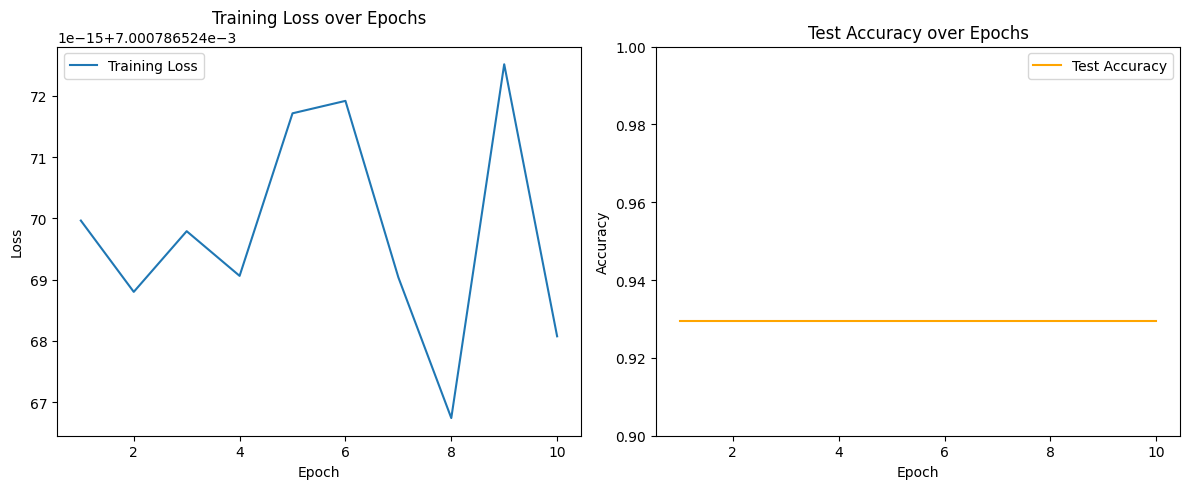

In [ ]:
import matplotlib.pyplot as plt

# Example training loop
epochs = 10
train_losses = []
test_accuracies = []

for epoch in range(epochs):
    # Training step, collect train_losses
    train_loss = simple_network.train(X_train_scaled, y_train)
    train_losses.append(train_loss)

    # Evaluation step, collect test accuracies
    corrects, wrongs = simple_network.evaluate(X_test_scaled, y_test)
    total = corrects + wrongs
    accuracy = corrects / total
    test_accuracies.append(accuracy)

# Plotting
plt.figure(figsize=(12, 5))

# Plot training loss on the dataset
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs + 1), train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()

# Plot test accuracy of the model
plt.subplot(1, 2, 2)
plt.plot(range(1, epochs + 1), test_accuracies, label='Test Accuracy', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Test Accuracy over Epochs')
plt.ylim([0.9, 1])
plt.legend()

plt.tight_layout()
plt.show()


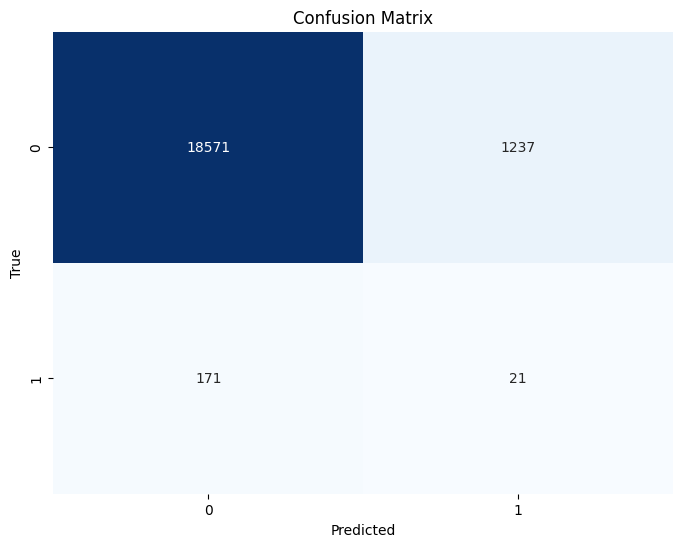

              precision    recall  f1-score   support

           0       0.99      0.94      0.96     19808
           1       0.02      0.11      0.03       192

    accuracy                           0.93     20000
   macro avg       0.50      0.52      0.50     20000
weighted avg       0.98      0.93      0.95     20000



In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# prediction storing
pred = [1 if simple_network.run(x) >= 0.5 else 0 for x in X_test_scaled]

# Compute confusion matrix initiation
conf_m = confusion_matrix(y_test, pred)

#confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_m, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print(classification_report(y_test, pred))


In [50]:
simple_network = NeuralNetwork(
    no_of_in_nodes=X_train_sm.shape[1],
    no_of_out_nodes=1,
    no_of_hidden_nodes1=128,
    no_of_hidden_nodes2=32,
    learning_rate=0.001,
    optimizer="mini_batch_sgd",
    l1_lambda=0.01,
    l2_lambda=0.01,
    hidden_activation="relu",
    output_activation="sigmoid",
    dropout_rate=0.5
)

batch_size = 128
epochs = 5

for epoch in range(epochs):
    avg_loss = simple_network.train(X_train_sm, y_train_sm, batch_size=batch_size)
    print(f"Epoch {epoch+1}/{epochs}, Average Loss: {avg_loss}")


corrects, wrongs = simple_network.evaluate(X_test_scaled, y_test)
total = corrects + wrongs
accuracy = corrects / total
print(f"Accuracy on test set: {accuracy:.2%}")




Epoch 1/5, Average Loss: 0.07791802118167812
Epoch 2/5, Average Loss: 0.08285551589332621
Epoch 3/5, Average Loss: 0.09974438102549495
Epoch 4/5, Average Loss: 0.10218993344275136
Epoch 5/5, Average Loss: 0.11082567597205141
Accuracy on test set: 0.96%


/var/folders/x3/znqp056977l_nmf5cqgjdp9r0000gn/T/ipykernel_47885/636566765.py:54: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/var/folders/x3/znqp056977l_nmf5cqgjdp9r0000gn/T/ipykernel_47885/636566765.py:104: RuntimeWarning: invalid value encountered in multiply
  return activations * dropout_mask / (1.0 - self.dropout_rate)  # Scale activations


Epoch 1/5, Average Loss: nan
Test Accuracy at Epoch 1: 99.04%
Epoch 2/5, Average Loss: nan
Test Accuracy at Epoch 2: 99.04%
Epoch 3/5, Average Loss: nan
Test Accuracy at Epoch 3: 99.04%
Epoch 4/5, Average Loss: nan
Test Accuracy at Epoch 4: 99.04%
Epoch 5/5, Average Loss: nan
Test Accuracy at Epoch 5: 99.04%


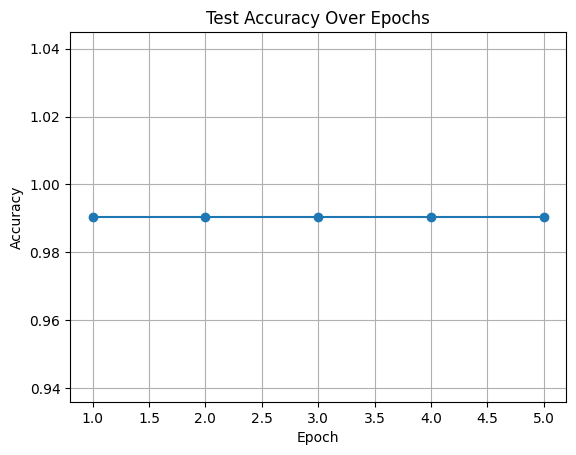

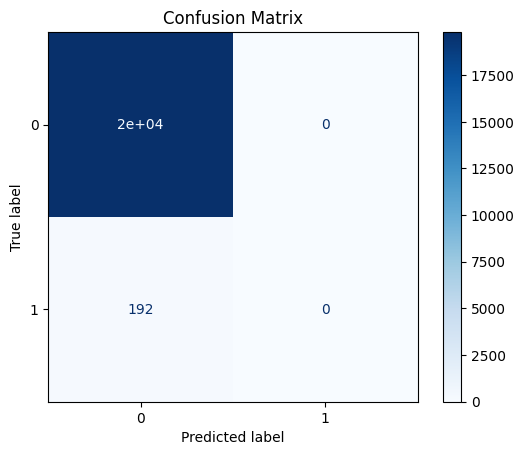

In [51]:

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Training loop with test accuracy tracking
accuracies = []

for epoch in range(epochs):
    avg_loss = simple_network.train(X_train_sm, y_train_sm, batch_size=batch_size)
    print(f"Epoch {epoch+1}/{epochs}, Average Loss: {avg_loss}")
    
    corrects, wrongs = simple_network.evaluate(X_test_scaled, y_test)
    total = corrects + wrongs
    accuracy = corrects / total
    accuracies.append(accuracy)
    print(f"Test Accuracy at Epoch {epoch+1}: {accuracy:.2%}")

# Plotting test accuracy over epochs
plt.plot(range(1, epochs + 1), accuracies, marker='o')
plt.title("Test Accuracy Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

# Confusion matrix
predictions = [1 if simple_network.run(x) >= 0.5 else 0 for x in X_test_scaled]
cm = confusion_matrix(y_test, predictions)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

